# Machine Learning (SVM & Random Forest)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_validate
import seaborn as sn
import matplotlib.pyplot as plt
import graphviz
#pd.set_option('display.max_rows', 500)

#### Import dataset

In [2]:
ngs_reads = pd.read_json('exported_datasets/efcm.json')

In [3]:
ngs_reads.reset_index(drop=True, inplace=True)

In [4]:
# convert dict type columns to dataframes
for category in ngs_reads:
    if type(ngs_reads[category][0]) is dict:
        ngs_reads[category] = ngs_reads[category].apply(pd.DataFrame)

#### extract target variable

In [5]:
target = ngs_reads.evaluation.values
ngs_reads.drop(columns='evaluation', inplace=True)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### remove unfinished columns from dataset

In [6]:
cols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
ngs_reads.drop(ngs_reads.columns[cols], axis=1, inplace=True)

In [7]:
ngs_reads.drop(columns=['organism', 'technology', 'read_number'], inplace=True)
ngs_reads

,total_sequences,percent_gc,min_sequence_length,max_sequence_length,status_module_0,status_module_1,status_module_2,status_module_3,status_module_4,status_module_5,status_module_6,status_module_7,status_module_8,status_module_9,status_module_10
0,15187,37,35,301,2,2,1,2,0,2,2,1,2,2,2
1,733019,38,301,301,2,0,2,2,0,2,2,2,1,2,0
2,269263,38,35,301,2,1,2,2,0,2,2,1,2,2,2
3,265224,38,35,301,2,0,1,2,0,2,2,1,2,2,2
4,733019,39,301,301,2,0,2,2,0,2,2,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1367226,38,35,251,2,2,2,2,0,2,2,1,0,1,2
84,1836688,39,35,251,2,2,2,2,0,2,2,1,0,2,2
85,799870,37,35,251,2,2,2,2,0,2,2,1,0,1,2
86,1369977,39,35,251,2,2,2,2,0,2,2,1,0,2,2


#### train-test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(ngs_reads, target, test_size=0.3, random_state=109)

#### Confusion Matrix Heatmap Training Set

<AxesSubplot:>

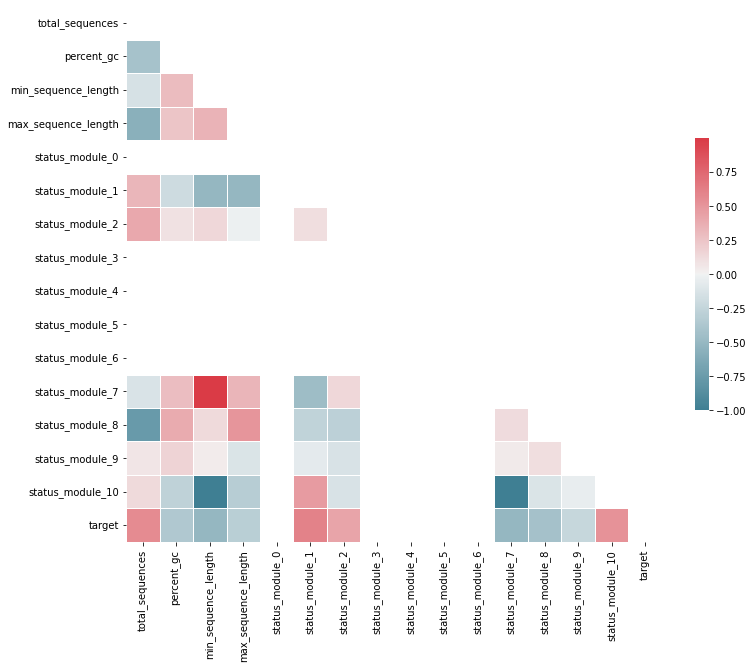

In [9]:
train = X_train.copy()
train.loc[:, 'target'] = y_train.tolist()
train

corr_matrix = train.corr()

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
sn.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5})

#### Support Vector Machine Training

In [10]:
clf_svc = svm.SVC(kernel='linear')

In [11]:
clf_svc.fit(X_train, y_train)

SVC(kernel='linear')

##### SVM performance

In [12]:
y_pred=clf_svc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.7037037037037037
Precision:  0.68
Recall:  1.0
F1 Score:  0.8095238095238095


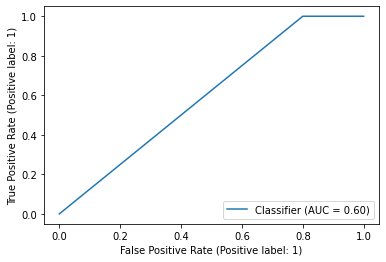

In [13]:
metrics.RocCurveDisplay.from_predictions(y_test, y_pred)

#### SVM with Cross Validation

In [14]:
clf_svm_cv = svm.SVC(kernel='linear')
scores = cross_validate(clf_svm_cv, ngs_reads, target, cv=5, 
                        scoring=('accuracy', 'f1'), return_train_score=True)
print("Accuracies: ", scores['test_accuracy'])
print("F1 Scores: ", scores['test_f1'])

print("Accuracy: %0.2f +/- %0.2f" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("F1 Score: %0.2f +/- %0.2f" % (scores['test_f1'].mean(), scores['test_f1'].std()))

Accuracies:  [0.94444444 1.         1.         0.76470588 0.64705882]
F1 Scores:  [0.95238095 1.         1.         0.83333333 0.78571429]
Accuracy: 0.87 +/- 0.14
F1 Score: 0.91 +/- 0.09


#### Decision Tree

In [15]:
clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)

In [16]:
y_pred = clf_dt.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


[Text(0.5769230769230769, 0.9, 'total_sequences <= 771691.0\ngini = 0.477\nsamples = 61\nvalue = [24, 37]\nclass = good'),
 Text(0.3076923076923077, 0.7, 'status_module_9 <= 1.5\ngini = 0.18\nsamples = 20\nvalue = [18, 2]\nclass = ugly'),
 Text(0.15384615384615385, 0.5, 'status_module_10 <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = ugly'),
 Text(0.07692307692307693, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = ugly'),
 Text(0.23076923076923078, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = good'),
 Text(0.46153846153846156, 0.5, 'total_sequences <= 703611.5\ngini = 0.105\nsamples = 18\nvalue = [17, 1]\nclass = ugly'),
 Text(0.38461538461538464, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]\nclass = ugly'),
 Text(0.5384615384615384, 0.3, 'status_module_7 <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = ugly'),
 Text(0.46153846153846156, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = good'),
 Text(0.6153846153846154, 0.1, 'gini = 0.0\nsam

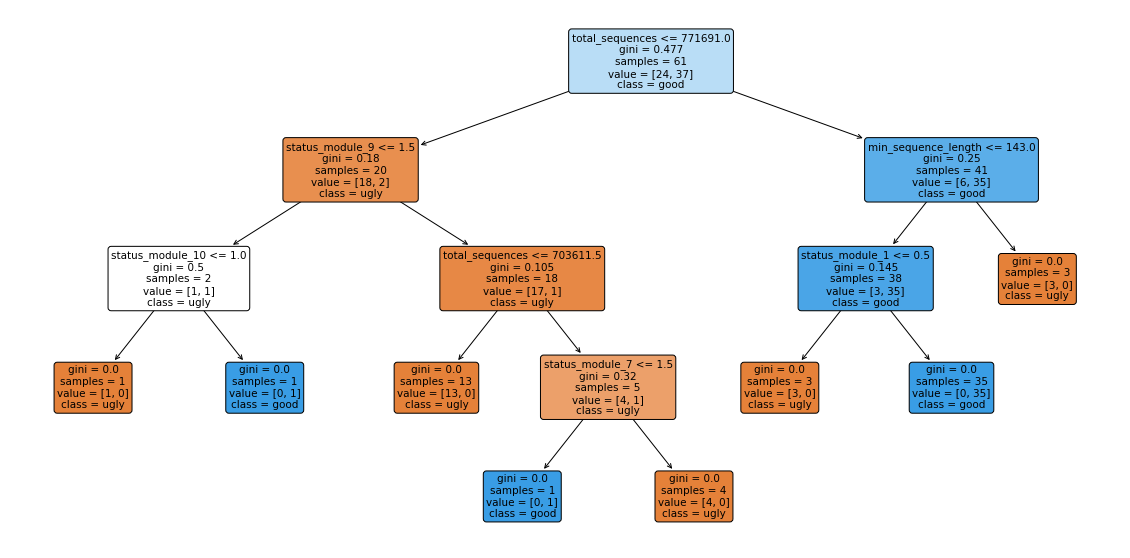

In [17]:
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(clf_dt, 
          feature_names=ngs_reads.columns,
          class_names=['ugly', 'good'], 
          filled=True, impurity=True, 
          rounded=True)

#### Random Forest Training

In [18]:
clf_rf=RandomForestClassifier(n_estimators=100, verbose=True)

In [19]:
clf_rf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(verbose=True)

##### Random Forest performance

In [20]:
y_pred = clf_rf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


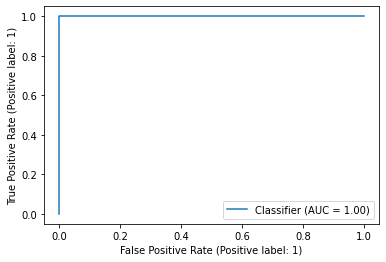

In [21]:
metrics.RocCurveDisplay.from_predictions(y_test, y_pred)

#### Feature Importance Random Forest

Text(0.5, 0, 'Relative Importance')

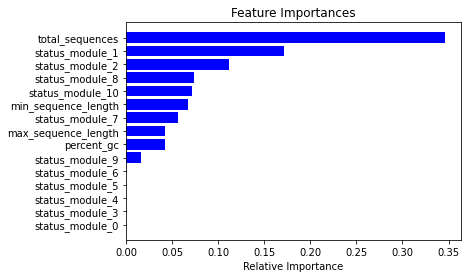

In [22]:
importances = clf_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), X_train.columns[indices])
plt.xlabel('Relative Importance')

#### Random Forest with Cross Validation

In [23]:
clf_rf_cv = RandomForestClassifier(n_estimators=100)
scores = cross_validate(clf_rf_cv, ngs_reads, target, cv=5, 
                        scoring=('accuracy', 'f1'), return_train_score=True)
print("Accuracies: ", scores['test_accuracy'])
print("F1 Scores: ", scores['test_f1'])

# higher cv results in most accuracies = 1.0

print("Accuracy: %0.2f +/- %0.2f" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("F1 Score: %0.2f +/- %0.2f" % (scores['test_f1'].mean(), scores['test_f1'].std()))

Accuracies:  [1. 1. 1. 1. 1.]
F1 Scores:  [1. 1. 1. 1. 1.]
Accuracy: 1.00 +/- 0.00
F1 Score: 1.00 +/- 0.00


#### Visualize some trees of the Random Forest

[Text(0.4444444444444444, 0.9166666666666666, 'status_module_1 <= 0.5\ngini = 0.497\nsamples = 37\nvalue = [28, 33]\nclass = good'),
 Text(0.3333333333333333, 0.75, 'gini = 0.0\nsamples = 8\nvalue = [13, 0]\nclass = ugly'),
 Text(0.5555555555555556, 0.75, 'percent_gc <= 39.5\ngini = 0.43\nsamples = 29\nvalue = [15, 33]\nclass = good'),
 Text(0.4444444444444444, 0.5833333333333334, 'status_module_1 <= 1.5\ngini = 0.391\nsamples = 27\nvalue = [12, 33]\nclass = good'),
 Text(0.2222222222222222, 0.4166666666666667, 'status_module_2 <= 1.5\ngini = 0.48\nsamples = 3\nvalue = [2, 3]\nclass = good'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = ugly'),
 Text(0.3333333333333333, 0.25, 'status_module_9 <= 1.5\ngini = 0.375\nsamples = 2\nvalue = [1, 3]\nclass = good'),
 Text(0.2222222222222222, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 3]\nclass = good'),
 Text(0.4444444444444444, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\n

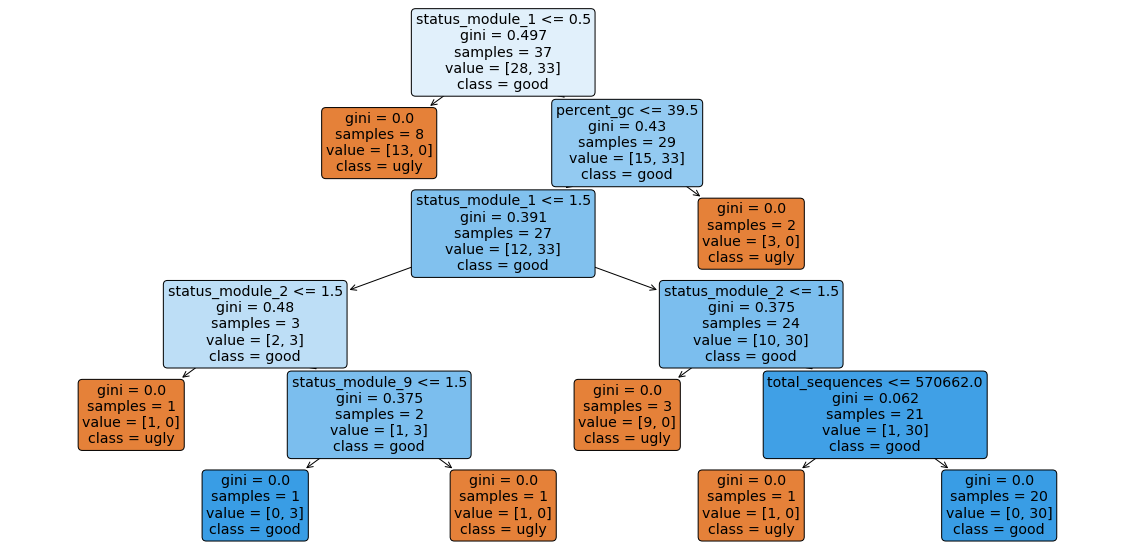

In [24]:
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(clf_rf.estimators_[0], 
          feature_names=ngs_reads.columns,
          class_names=['ugly', 'good'], 
          filled=True, impurity=True, 
          rounded=True)

[Text(0.5, 0.875, 'total_sequences <= 771691.0\ngini = 0.47\nsamples = 36\nvalue = [23, 38]\nclass = good'),
 Text(0.2, 0.625, 'status_module_1 <= 1.5\ngini = 0.34\nsamples = 13\nvalue = [18, 5]\nclass = ugly'),
 Text(0.1, 0.375, 'gini = 0.0\nsamples = 7\nvalue = [12, 0]\nclass = ugly'),
 Text(0.3, 0.375, 'total_sequences <= 485780.5\ngini = 0.496\nsamples = 6\nvalue = [6, 5]\nclass = ugly'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [6, 0]\nclass = ugly'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 5]\nclass = good'),
 Text(0.8, 0.625, 'status_module_7 <= 1.5\ngini = 0.229\nsamples = 23\nvalue = [5, 33]\nclass = good'),
 Text(0.7, 0.375, 'status_module_1 <= 0.5\ngini = 0.057\nsamples = 21\nvalue = [1, 33]\nclass = good'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = ugly'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 20\nvalue = [0, 33]\nclass = good'),
 Text(0.9, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [4, 0]\nclass = ugly')]

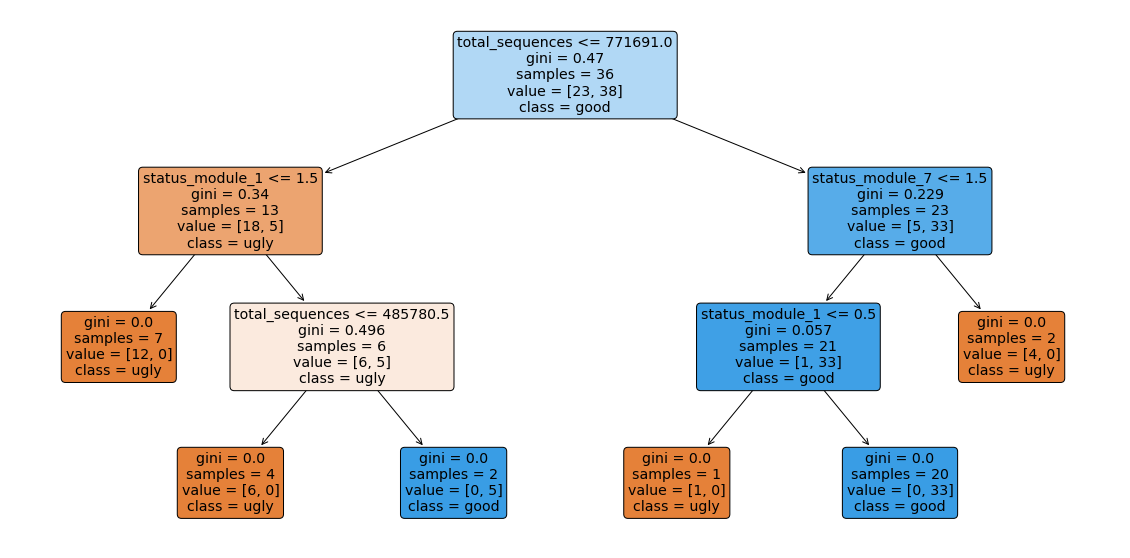

In [25]:
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(clf_rf.estimators_[12], 
          feature_names=ngs_reads.columns,
          class_names=['ugly', 'good'], 
          filled=True, impurity=True, 
          rounded=True)

#### Other Classification Algorithms

Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
clf_lg = LogisticRegression(random_state=0).fit(X_train, y_train)

In [27]:
y_pred = clf_lg.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.8888888888888888
Precision:  0.85
Recall:  1.0
F1 Score:  0.9189189189189189


Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB().fit(X_train, y_train)

In [29]:
y_pred = clf_gnb.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.7037037037037037
Precision:  0.68
Recall:  1.0
F1 Score:  0.8095238095238095


K Nearest Neighbors

In [30]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.7037037037037037
Precision:  0.7647058823529411
Recall:  0.7647058823529411
F1 Score:  0.7647058823529412
